In [1]:
import numpy as np
import pickle
import os

file_root = '/Users/niladri/Desktop/Research/deep_linear_networks_ols/Benign-Overfitting-in-Deep-Linear-Networks/results/logs/'

results = {}
keys = ['500', '1000', '2000']

filename = 'exp_3/result.pickle'
filename = os.path.join(file_root,filename)

    
with (open(filename, "rb")) as file:
    results['alpha'] = pickle.load(file)
    
filename = 'exp_5/result.pickle'
filename = os.path.join(file_root,filename)

    
with (open(filename, "rb")) as file:
    results['beta'] = pickle.load(file)

In [2]:
results

{'alpha': {0: {'alpha': 0.0,
   'dimension': 10,
   'distance': [],
   'risk': [0.07981016486883163,
    0.1277797967195511,
    0.2209913432598114,
    0.1932404488325119,
    0.13017946481704712,
    0.0919686108827591,
    0.21789062023162842,
    0.16727136075496674,
    0.06997684389352798,
    0.09387842565774918,
    0.15435026586055756,
    0.12286274880170822,
    0.12905928492546082,
    0.16021892428398132,
    0.18409204483032227,
    0.10897722095251083,
    0.19147980213165283,
    0.1427852064371109,
    0.1042725145816803,
    0.1533496081829071],
   'risk_teacher': [0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0],
   'training_loss': [2.9075915813446045,
    2.9579129219055176,
    3.141326427459717,
    3.2054266929626465,
    2.985758066177368,
    3.1268699169158936,
    3.272885322570801,
    3.2246861457824707,
    2.9148504734039307,
   

In [3]:
# Extract the dimensions from the data
alphas = []
betas = []

for j in range(10):
    alphas.append(results['alpha'][j]['alpha'])
    betas.append(results['beta'][j]['beta'])

# Calculate average and standard deviations for the results
average_risk_alpha = np.zeros((1,len(alphas)))
average_risk_ols_alpha = np.zeros((1,len(alphas)))
average_training_loss_alpha = np.zeros((1,len(alphas)))

ci_risk_alpha = np.zeros((1,len(alphas)))

average_risk_beta = np.zeros((1,len(betas)))
average_risk_ols_beta = np.zeros((1,len(betas)))
average_training_loss_beta = np.zeros((1,len(betas)))

ci_risk_beta = np.zeros((1,len(betas)))





for j in range(len(alphas)):
    # Calculate averages for scaling with alphas
    average_risk_alpha[0,j] = np.mean(results['alpha'][j]['risk'])
    average_risk_ols_alpha[0,j] = np.mean(results['alpha'][j]['risk_teacher'])
    average_training_loss_alpha[0,j] = np.mean(results['alpha'][j]['training_loss'])

    # Calculate confidence interval
    ci_risk_alpha[0,j] = 1.96*np.std(results['alpha'][j]['risk'],ddof=1)/np.sqrt(len(results['alpha'][j]['risk']))
    
    # Calculate averages for scaling with alphas
    average_risk_beta[0,j] = np.mean(results['beta'][j]['risk'])
    average_risk_ols_beta[0,j] = np.mean(results['beta'][j]['risk_teacher'])
    average_training_loss_beta[0,j] = np.mean(results['beta'][j]['training_loss'])

    # Calculate confidence interval
    ci_risk_beta[0,j] = 1.96*np.std(results['beta'][j]['risk'],ddof=1)/np.sqrt(len(results['beta'][j]['risk']))   

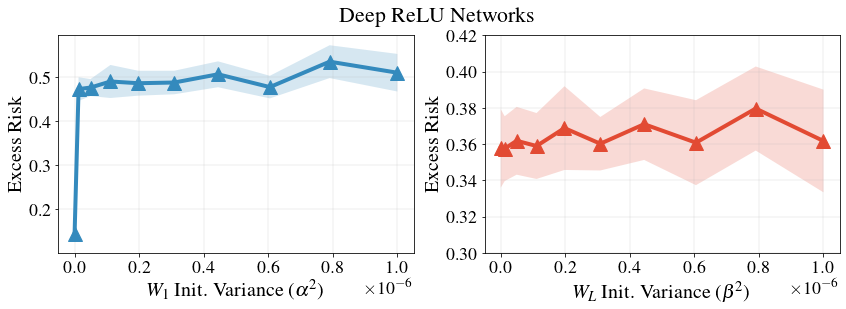

In [5]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import FormatStrFormatter

palette = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']
sns.set_palette(palette)


plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

fig = plt.figure(figsize=(14, 4))
fig.set_facecolor('white')
fig.patch.set_facecolor('white')
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.set_facecolor("#e1ddbf")
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_facecolor("#e1ddbf")
plt.locator_params(axis="y", nbins=6)


ax1.plot(np.array(alphas)**2,average_risk_alpha[0,:],
         marker='^',
         markersize = 14,
         markevery=1,
         linewidth=4,
         linestyle='solid',alpha=0.0)
ax1.fill_between(np.array(alphas)**2, 
                 average_risk_alpha[0,:]-ci_risk_alpha[0,:], 
                 average_risk_alpha[0,:]+ci_risk_alpha[0,:], alpha=.0)

ax1.plot(np.array(alphas)**2,average_risk_alpha[0,:],
         marker='^',
         markersize = 14,
         markevery=1,
         linewidth=4,
         linestyle='solid')
ax1.fill_between(np.array(alphas)**2, 
                 average_risk_alpha[0,:]-ci_risk_alpha[0,:], 
                 average_risk_alpha[0,:]+ci_risk_alpha[0,:], alpha=.2)

ax2.plot(np.array(betas)**2,average_risk_beta[0,:],
         marker='^',
         markersize = 14,
         markevery=1,
         linewidth=4,
         linestyle='solid')
ax2.fill_between(np.array(betas)**2, 
                 average_risk_beta[0,:]-ci_risk_beta[0,:], 
                 average_risk_beta[0,:]+ci_risk_beta[0,:], alpha=0.2)

#ax1.errorbar(np.array(alphas)**2,average_risk[0,:], std_risk[0,:], linestyle='None', marker='^')
#ax1.plot(alphas,average_risk[3,:],'o',markersize = 14,markevery=1,linewidth=4,label=r'$\alpha=1e-4$',linestyle='solid')
#ax1.plot(alphas,average_risk[2,:],'*',markersize = 14,markevery=1,linewidth=4,label=r'$\alpha=1e-3$',linestyle='solid')
#ax1.plot(alphas,average_risk[1,:],'*',markersize = 16,markevery=1,linewidth=4,label=r'$\mathsf{OLS}$',linestyle='solid')
#ax1.plot(alphas,average_risk_ols[1,:],'*',markersize = 16,markevery=1,linewidth=4,label=r'$\mathsf{OLS}$',linestyle='solid')



#ax2.plot(alphas,average_distance[0,:],'^',markersize = 14,markevery=1,linewidth=4,label=r'$\alpha=0.0$',linestyle='solid')
#ax2.plot(alphas,average_distance[3,:],'o',markersize = 14,markevery=1,linewidth=4,label=r'$\alpha=1e-4$',linestyle='solid')
#ax2.plot(alphas,average_distance[2,:],'*',markersize = 14,markevery=1,linewidth=4,label=r'$\alpha=1e-3$',linestyle='solid')



ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax1.grid(True, linewidth=0.2)
ax2.grid(True, linewidth=0.2)

ax1.set_xlabel(r'$W_1$ Init. Variance ($\alpha^2$)',size=20)
ax2.set_xlabel(r'$W_L$ Init. Variance ($\beta^2$)',size=20)
#ax1.set_xticks([0, 1, 2, 3, 4, 5])

#ax1.set_ylim(60, 69)
ax2.set_ylim(0.3, 0.42)

fig.suptitle(r'Deep ReLU Networks', fontsize=22)
ax1.set_ylabel("Excess Risk",size=20)
ax2.set_ylabel("Excess Risk",size=20)
#ax2.set_ylabel(r'$\|\Theta - \Theta_{\mathsf{OLS}}\|_2^2$',size=20)
#ax1.set_title("Test Error vs. Importance Weight " r'$(w=\tau^{\rho})$',size=18)
handles1, labels1 = ax1.get_legend_handles_labels()
#handles2, labels2 = ax2.get_legend_handles_labels()
#handles = [handles[1], handles[2], handles[0]]
#labels = [labels[1], labels[2], labels[0]]
#ax1.legend(handles1, labels1, loc='lower right',prop={'size': 16},facecolor='white')
#ax2.legend(handles2, labels2, loc='upper left',prop={'size': 16},facecolor='white')
#ax1.legend(loc='best',prop={'size': 12},facecolor='white')
plt.savefig('scaling_relu.png', bbox_inches='tight',dpi=1000)
plt.show()